## Fake News Detection

#### Import library

In [1]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [2]:
df = pd.read_csv("fake.csv")

In [3]:
#df = df[['title','comments','label']]

In [4]:
df.head()

title  \
0  Bungalow with private island up for sale for ?...   
1    Americans react to Bollywood song &# ;Pinga&# ;   
2      World Toilet Day is celebrated on November 19   
3     Over 1.57 lakh people affected by Assam floods   
4          Varun Gandhi unhurt after stage collapses   

                                                text          sources label  
0  A bungalow with a private island, located off ...        Bloomberg  FAKE  
1  A video by YouTube channel &# ;Fomo Daily&# ; ...          YouTube  FAKE  
2  The United Nations has designated November 19 ...   United Nations  FAKE  
3  Over 1.57 lakh people reportedly have been aff...  Northeast Today  FAKE  
4  BJP MP Varun Gandhi on Sunday escaped unhurt a...      India Today  FAKE

In [5]:
df.shape

(56410, 4)

In [6]:
df.isnull().sum()

title      0
text       0
sources    0
label      0
dtype: int64

In [7]:
labels = df.label

In [8]:
labels.head()

0    FAKE
1    FAKE
2    FAKE
3    FAKE
4    FAKE
Name: label, dtype: object

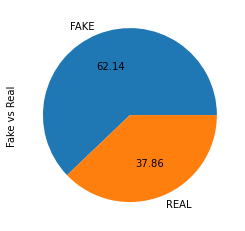

In [9]:
df.groupby('label').size().plot(kind='pie', autopct='%.2f',label='Fake vs Real')
plt.show()

In [10]:
df['title_length'] = df['title'].apply(len)
df['text_length'] = df['text'].apply(len)
df.head()

title  \
0  Bungalow with private island up for sale for ?...   
1    Americans react to Bollywood song &# ;Pinga&# ;   
2      World Toilet Day is celebrated on November 19   
3     Over 1.57 lakh people affected by Assam floods   
4          Varun Gandhi unhurt after stage collapses   

                                                text          sources label  \
0  A bungalow with a private island, located off ...        Bloomberg  FAKE   
1  A video by YouTube channel &# ;Fomo Daily&# ; ...          YouTube  FAKE   
2  The United Nations has designated November 19 ...   United Nations  FAKE   
3  Over 1.57 lakh people reportedly have been aff...  Northeast Today  FAKE   
4  BJP MP Varun Gandhi on Sunday escaped unhurt a...      India Today  FAKE   

   title_length  text_length  
0            54          334  
1            47          418  
2            45          374  
3            46          384  
4            41          368

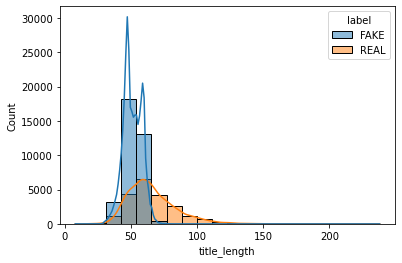

In [11]:
fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(x = df["title_length"], hue = df["label"], kde=True, bins=20);


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(df["title"], labels, test_size = 0.2, random_state = 20)

In [14]:
x_train.head()

1080       Will setup 38,000 MSME units in Odisha: Patnaik
33882        Jaipur 1000 atms under bhamashah to come up  
12966    Entertainment hindi bollywood news anushka sha...
55079    Video: David Warner bowled by Jayant Yadav off...
24032    Life style health fitness de stress cricketer ...
Name: title, dtype: object

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier

In [16]:
# initialise a Tfidvectorizer
vector = TfidfVectorizer(stop_words='english', max_df=0.7)

In [17]:
# fit and transform
tf_train = vector.fit_transform(x_train)
tf_test = vector.transform(x_test)

In [18]:
# initialise a PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [19]:
# prediction the test dataset
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = pac.predict(tf_test)


In [20]:
j=0
for i in y_pred:
    #print(i)
    j=j+1
print(j)

11282


In [21]:
x_train

1080       Will setup 38,000 MSME units in Odisha: Patnaik
33882        Jaipur 1000 atms under bhamashah to come up  
12966    Entertainment hindi bollywood news anushka sha...
55079    Video: David Warner bowled by Jayant Yadav off...
24032    Life style health fitness de stress cricketer ...
                               ...                        
23452    &# ;Patel would have made Kashmir a part of In...
23775     RSS affiliate to launch party for 2017 Goa polls
37135    Tv news hindi vahbiz dorabjee vivian dsena is ...
27098    Three monkeys stolen from wildlife park in Aus...
48483    NASCAR driver pulled over for speeding on his ...
Name: title, Length: 45128, dtype: object

In [22]:
x_test

7950     Sports tennis top stories dubai duty free vint...
13108    Zuckerberg sells $95 mn Facebook shares for ch...
15724    Elections assembly elections uttarakhand news ...
31954    More than 100 candidates got less than even 10...
9089       Punjab: Pigeon with words written in Urdu found
                               ...                        
16746        Kenyan sets 3000m steeplechase Olympic record
54767        Massive alligator caught on camera in Florida
47706    Bengaluru bengaluru sees spike in viral fever ...
1522     Jaipur yuvak prerak fellowship of rajasthan go...
43877    Pune govt vehicles escape penalty as traffic d...
Name: title, Length: 11282, dtype: object

In [23]:
score = accuracy_score(y_test, y_pred)
print(score)


0.9406133664243929


In [24]:
res=round(score*100,2)
print(res)

94.06


In [25]:
print("Accuracy: ",res)

Accuracy:  94.06


In [26]:
import pickle
filename1 = 'accuracy_model.sav'
pickle.dump(res, open(filename1, 'wb'))

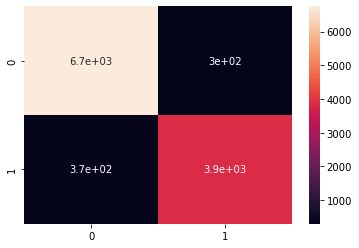

In [27]:
# confusion metrics
cm=confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
sns.heatmap(cm,annot=True)
plt.show()
c=plt.show()



In [28]:
# save model
import pickle
filename = 'finalized_model.pkl'
pickle.dump(pac, open(filename, 'wb'))


In [29]:
# save vectorizer
filename2 = 'vectorizer.pkl'
pickle.dump(vector, open(filename2, 'wb'))